In [5]:
import pandas as pd
df = pd.read_csv("Uber Request Data (2).csv", parse_dates=[4,5])
df.head(2000)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
1995,1551,City,210.0,Trip Completed,2016-12-07 06:10:00,2016-12-07 06:54:00
1996,2041,City,210.0,Trip Completed,2016-12-07 14:24:00,2016-12-07 15:13:00
1997,2666,City,210.0,Trip Completed,2016-12-07 23:40:00,2016-07-13 00:22:19
1998,3348,City,210.0,Trip Completed,2016-07-13 13:12:47,2016-07-13 14:05:36


In [6]:
import datetime as dt
df["Hour"] = df["Request timestamp"].dt.hour
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [7]:
import numpy as np
timestamp = [
    (df['Hour'] <= 3) ,
    (df['Hour'] > 3) & (df['Hour'] <=8),
    (df['Hour'] > 8)&(df['Hour']<=14),
    (df['Hour']>14)& (df['Hour']<=20),
    (df['Hour']>20)]
choicelist = ['early morning', 'morning', 'afternoon','evening','night']
df['TIMESLOT2'] = np.select(timestamp, choicelist)


In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frequency of requests as per every hour')

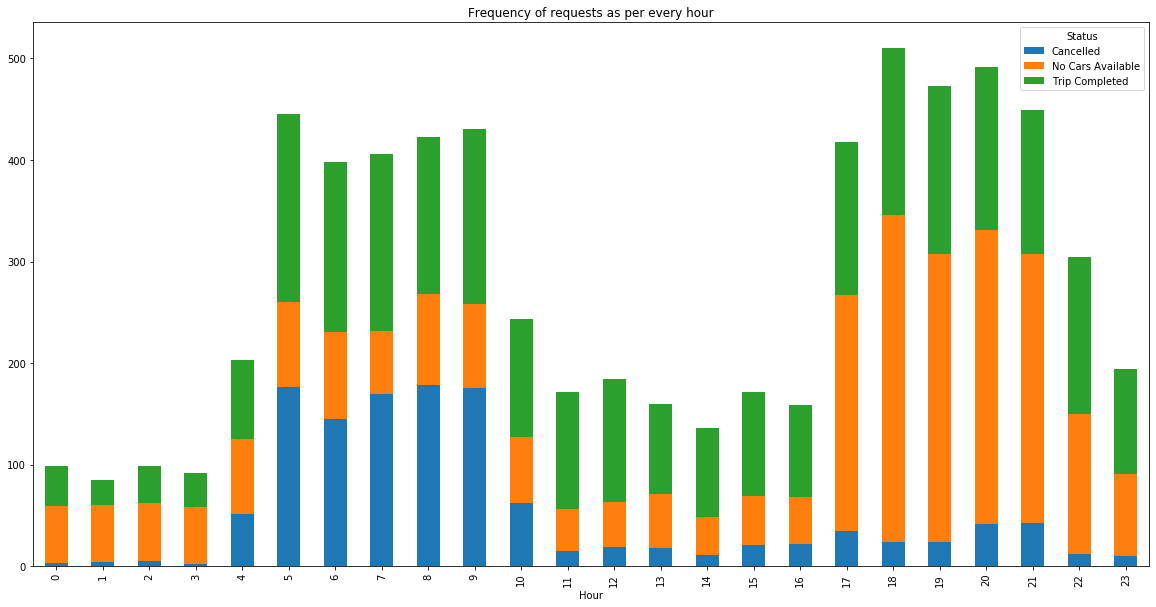

In [9]:
# Frequency of requests every hour
df.groupby(['Hour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Frequency of requests as per every hour')

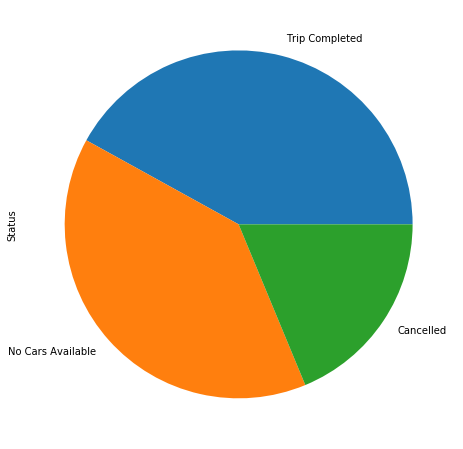

In [10]:
#Checking the status of the trips
ax = df['Status'].value_counts().plot(kind='pie',figsize=(14,8))

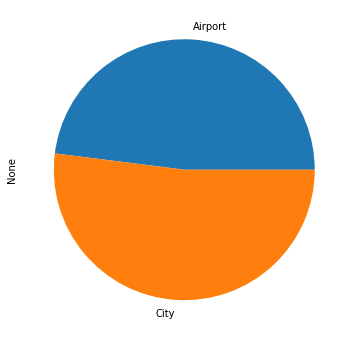

In [11]:
#Most problematic requests
df.groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(6, 6))

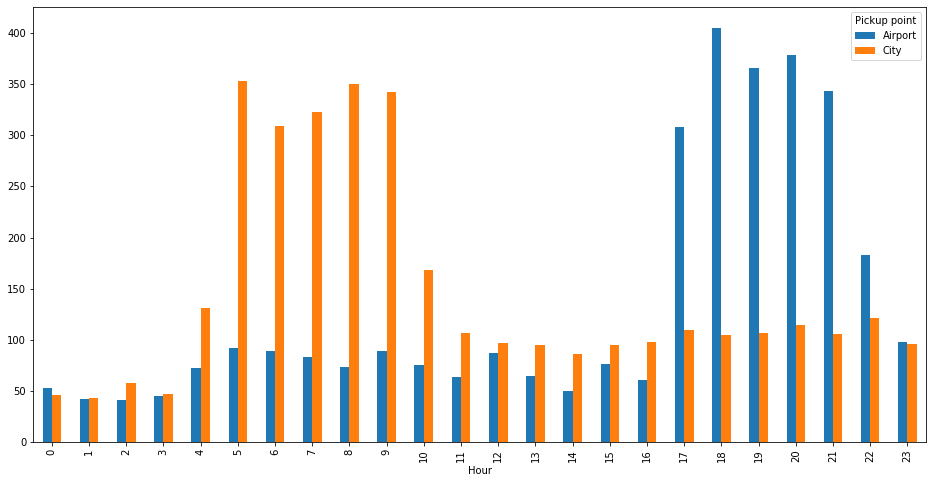

In [12]:
#Checking the pickup points every hour
ax = df.groupby(['Pickup point','Hour'])['Pickup point'].size().unstack(0).plot.bar(figsize=(16,8))

In [13]:
df["Cab Availability"] = df["Status"].apply(lambda x: "Available" if x=="Trip Completed" else "Not Available")


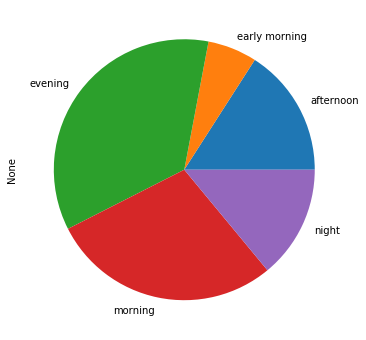

In [14]:
#Checking the problematic time slots where cab is not available 
df[(df["Cab Availability"]=="Not Available")].groupby(['TIMESLOT2']).size().plot(kind="pie",stacked=True,figsize=(6, 6))

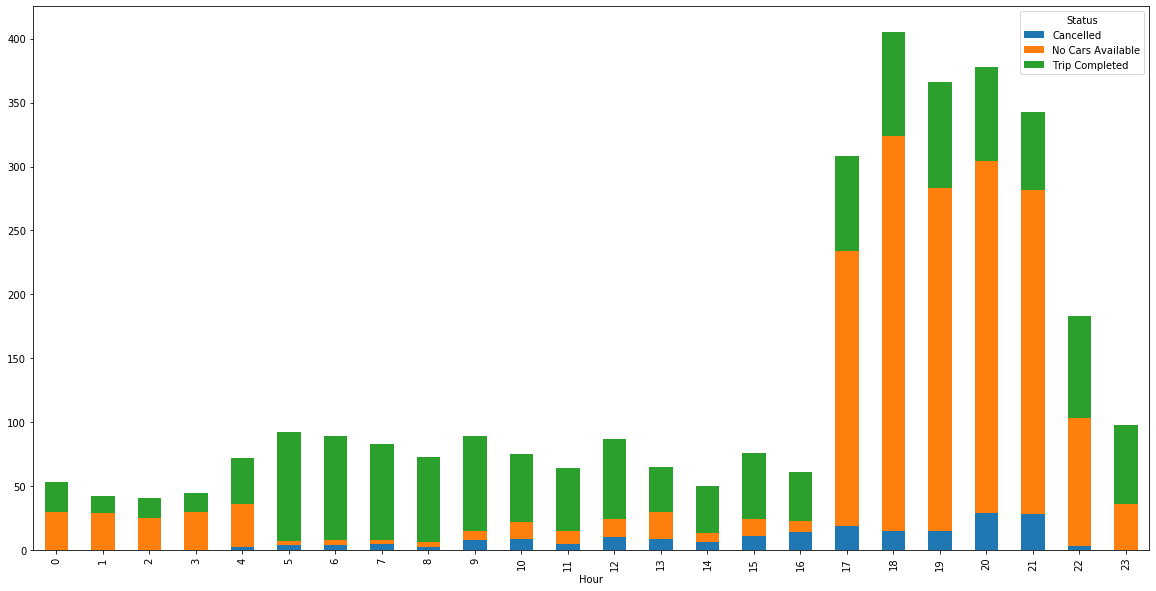

In [15]:
#Checking the status when the pickup point is Airport
ax=df[(df['Pickup point']=="Airport")].groupby(['Hour','Status']).size().unstack().plot.bar(figsize=(20, 10),stacked=True)

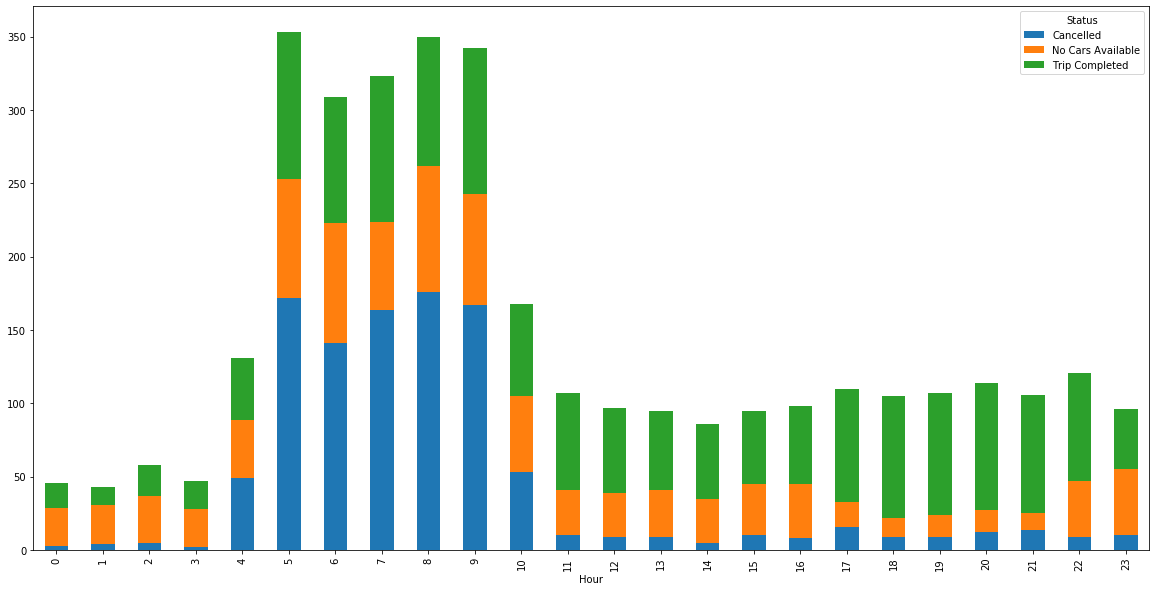

In [16]:
#Checking the status when the pickup point is City
df[(df['Pickup point']=="City")].groupby(['Hour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))

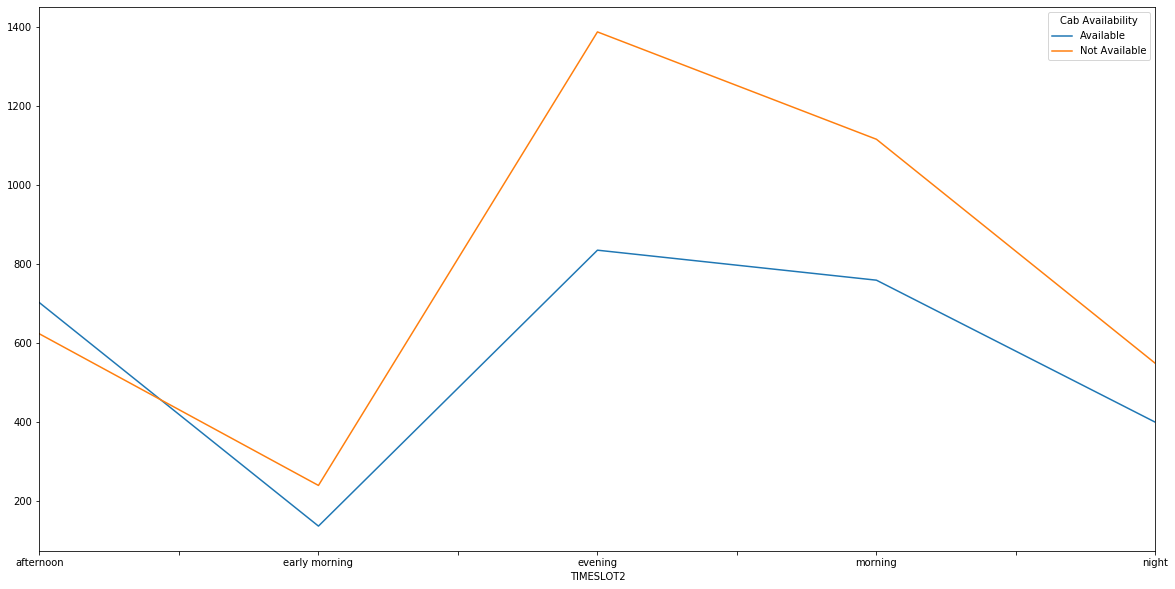

In [17]:
#Checking the time slots where highest gap exists
df.groupby(['TIMESLOT2','Cab Availability']).size().unstack().plot(kind='line',figsize=(20, 10))

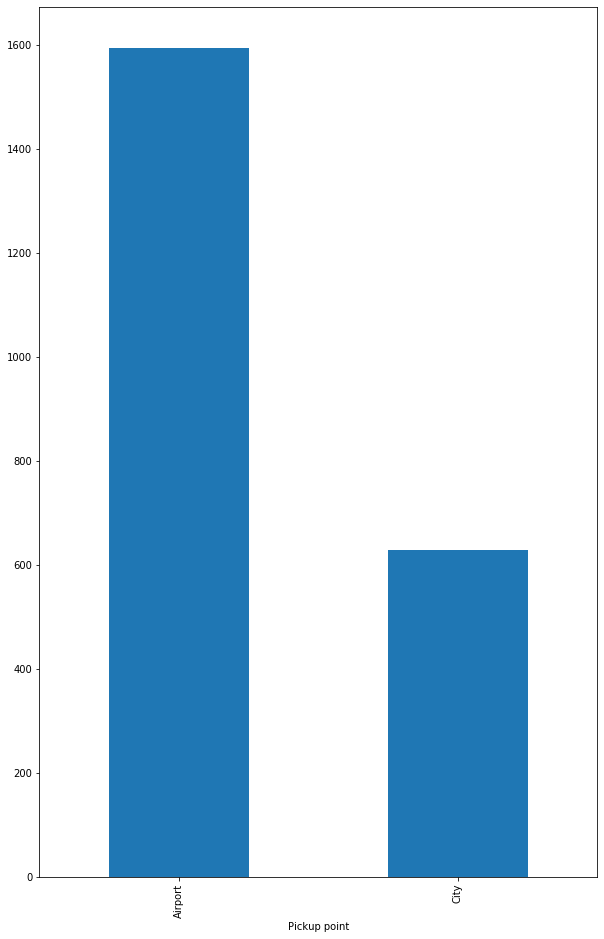

In [19]:
# (city-airport or airport-city) for which the gap is the most i.e evening
df[df["TIMESLOT2"]=="evening"].groupby(['Pickup point']).size().plot(kind="bar",stacked=True,figsize=(10,16))
